In [2]:
import numpy as np
from sklearn import svm

In [4]:
X = np.array([[0, 0], [1, 1]])
y = [0, 1]

In [5]:
LinearSVM = svm.LinearSVC()
LinearSVM.fit(X, y)

LinearSVC()

In [6]:
LinearSVM.predict([[2, 2]])
print(LinearSVM.coef_[0])
print(LinearSVM.intercept_[0])

[0.58822994 0.58822994]
-0.4705748577631975


In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

[0.58822994 0.58822994]


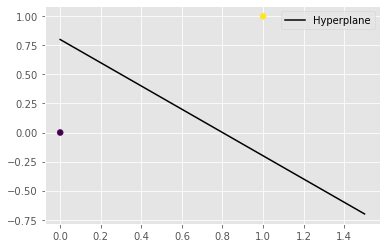

In [10]:
w = LinearSVM.coef_[0]
print(w)
b = LinearSVM.intercept_[0]
slope = -w[0] / w[0]
xx = np.linspace(0, 1.5)
yy = slope * xx - b/w[1]
h0 = plt.plot(xx, yy, 'k-', label = 'Hyperplane')
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()

In [11]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

In [12]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = [0, 1, 1, 0]

In [13]:
SVM_XOR = svm.SVC()
SVM_XOR.fit(X, y)

SVC()

In [33]:
test_data = np.array([[0.8, 0.8], [0.2, 0.9]])
SVM_XOR.predict(test_data)

array([0, 1])

In [34]:
data = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\분반(A반)\\weather.csv')
data.head()

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes


In [35]:
from sklearn.naive_bayes import MultinomialNB
multinomial_model = MultinomialNB()
multinomial_model

MultinomialNB()

In [65]:
def column_categorydict(column_name):
    list1 = sorted(list(data[column_name].value_counts().index))
    list2 = [x for x in range(len(list1))]
    return  dict(zip(list1, list2))

In [79]:
for column_name in list(data.columns[:4]):
    data[column_name] = data[column_name].map(column_categorydict(column_name))

In [80]:
multinomial_model.fit(data.iloc[:, :4], data['play'])

MultinomialNB()

In [81]:
multinomial_model.predict([[1, 2, 0, 1]])

array(['yes'], dtype='<U3')

In [82]:
multinomial_model.predict_proba([[2, 2, 0, 1]])

array([[0.57311795, 0.42688205]])

In [83]:
from sklearn.datasets import load_iris
iris = load_iris()

In [84]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['species'] = iris.target

In [85]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [89]:
from sklearn.naive_bayes import GaussianNB
guassian_model = GaussianNB()

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:, :4], iris_df['species'], test_size = 0.33)

In [93]:
guassian_model.fit(X_train, y_train)

GaussianNB()

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, guassian_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      0.86      0.89        14
           2       0.91      0.95      0.93        21

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



In [97]:
print(confusion_matrix(y_test, guassian_model.predict(X_test)))

[[15  0  0]
 [ 0 12  2]
 [ 0  1 20]]
